In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

In [7]:
data = pd.read_excel(r"C:\Users\Priya\Documents\Ecommerce churn\E Commerce Dataset.xlsx", sheet_name='E Comm')

In [8]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


CustomerID column is not providing any information for prediction. So this column is dropped.

In [9]:
data.drop('CustomerID', inplace=True, axis=1)
data.head(1)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93


In [10]:
data.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [16]:
len(data)

5630

In [11]:
data.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

Since all the data types are int and float, there are no mixed data in the dataset that we should be worried about

We need to check how many of these variables are numerical and categorical.

In [12]:
data['Churn'].unique()

array([1, 0], dtype=int64)

This will be used as the target variable.

In [15]:
for col in data.columns:
    unique_vals = data[col].nunique()
    print(col, unique_vals)

Churn 2
Tenure 36
PreferredLoginDevice 3
CityTier 3
WarehouseToHome 34
PreferredPaymentMode 7
Gender 2
HourSpendOnApp 6
NumberOfDeviceRegistered 6
PreferedOrderCat 6
SatisfactionScore 5
MaritalStatus 3
NumberOfAddress 15
Complain 2
OrderAmountHikeFromlastYear 16
CouponUsed 17
OrderCount 16
DaySinceLastOrder 22
CashbackAmount 2586


From the above, it is clear that preferredLoginDevice, CityTier, PreferredPaymentMode, Gender, SatisfactionScore, PreferedOrderCat, MaritalStatus are categorical variables and others are numerical variables. (Need to check each of them individually to see if the values they contain are permitted values or not)

In [17]:
cat_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'SatisfactionScore', 'PreferedOrderCat', 'MaritalStatus']
for var in cat_vars:
    unique_vals = data[var].unique()
    print(f"Unique values for {var}: {unique_vals}")

Unique values for PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
Unique values for CityTier: [3 1 2]
Unique values for PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Unique values for Gender: ['Female' 'Male']
Unique values for SatisfactionScore: [2 3 5 4 1]
Unique values for PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique values for MaritalStatus: ['Single' 'Divorced' 'Married']


### We need to understand the basic statistic associated with the given variables.<br>For numerical variables:

In [45]:
column_names_num = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [46]:
for col in column_names_num:
    print(f"Description of column {col}")
    print(data[col].describe())

Description of column Tenure
count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64
Description of column WarehouseToHome
count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64
Description of column HourSpendOnApp
count    5630.000000
mean        2.934636
std         0.705528
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64
Description of column OrderAmountHikeFromlastYear
count    5365.000000
mean       15.707922
std         3.675485
min        11.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        26.000000
Name: OrderAmountHikeFromlastYear, dtype: float64
Description of colum

### For categorical variables: 

In [57]:
for col in cat_vars:
    freq_dist = data[col].value_counts()
    mode = data[col].mode()[0]
    cardinality = len(data[col].unique())
    print(f"Description of column {col}")
    print(f"Frequency of distribution is:\n", freq_dist,)
    print(f"Most repeated value is",mode)
    print(f"Cardinality is",cardinality)
    print("\n")


Description of column PreferredLoginDevice
Frequency of distribution is:
 Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
Most repeated value is Mobile Phone
Cardinality is 3


Description of column CityTier
Frequency of distribution is:
 1    3666
3    1722
2     242
Name: CityTier, dtype: int64
Most repeated value is 1
Cardinality is 3


Description of column PreferredPaymentMode
Frequency of distribution is:
 Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
Most repeated value is Debit Card
Cardinality is 7


Description of column Gender
Frequency of distribution is:
 Male      3384
Female    2246
Name: Gender, dtype: int64
Most repeated value is Male
Cardinality is 2


Description of column SatisfactionScore
Frequency of distribution is:
 3    1698
1    1164
5   

### Visualization of categorical variables: 

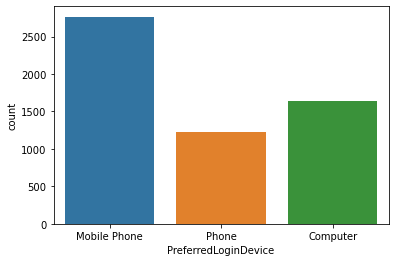

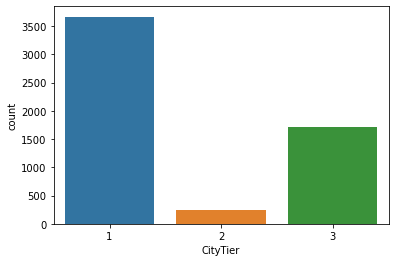

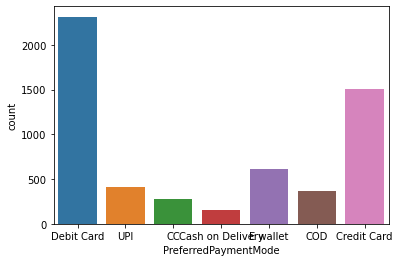

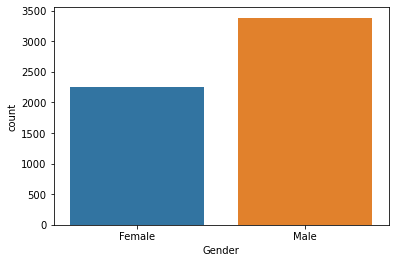

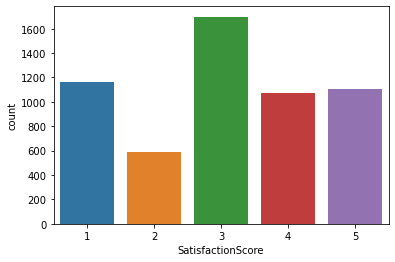

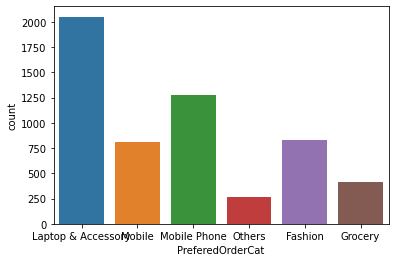

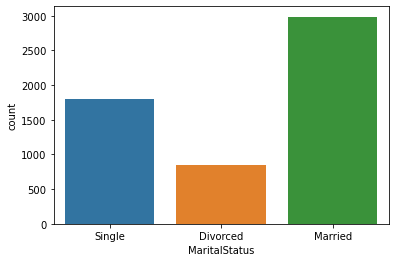

In [62]:
for col in cat_vars:
    sns.countplot(x=col, data=data)
    plt.show()

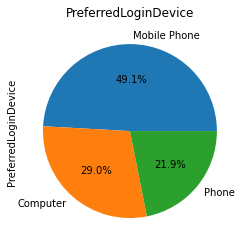

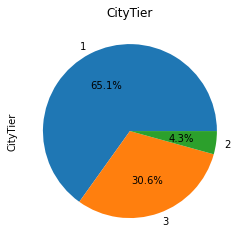

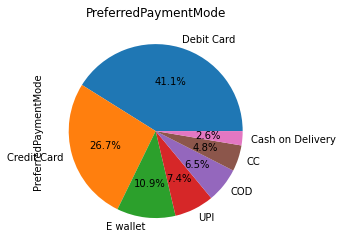

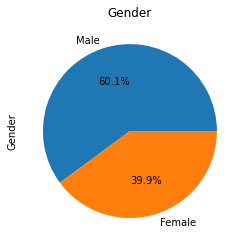

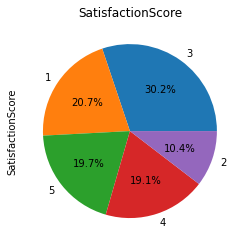

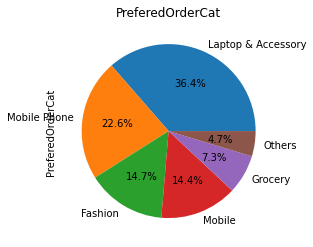

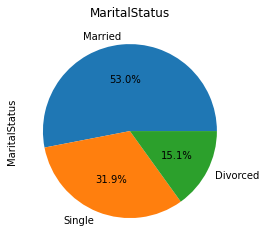

In [66]:
for col in cat_vars:
    data[col].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
    plt.title(col)
    plt.show()

### Visualization of numerical variables: 

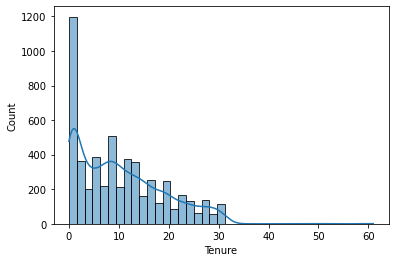

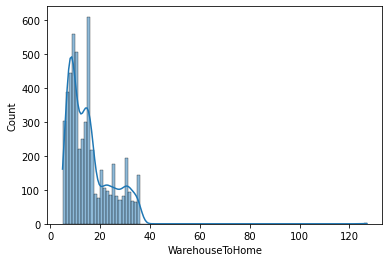

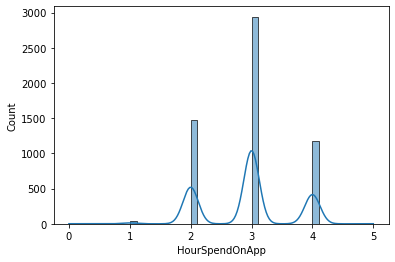

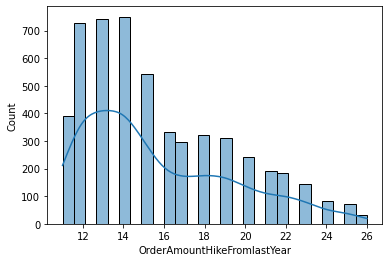

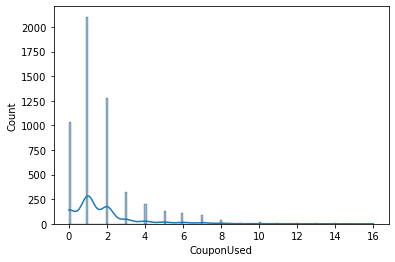

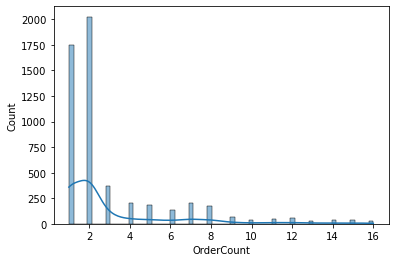

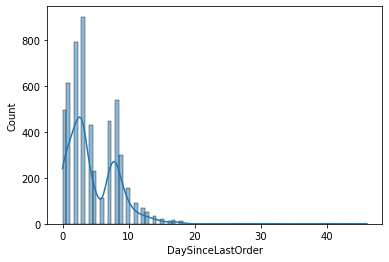

In [67]:
for col in column_names_num:
    sns.histplot(data[col], kde=True)
    plt.show()

We have to check for outlier values in the numerical variables.

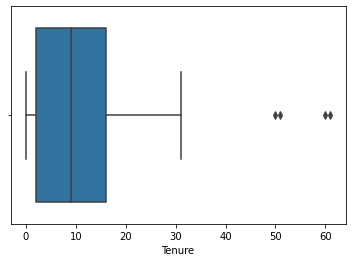

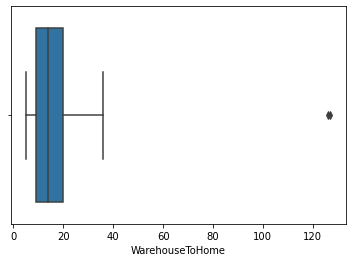

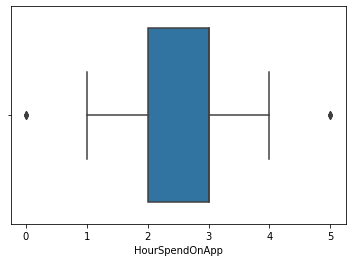

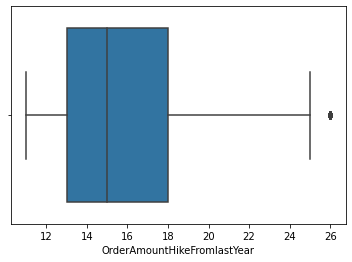

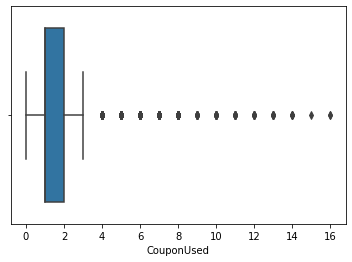

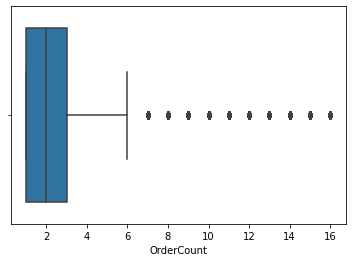

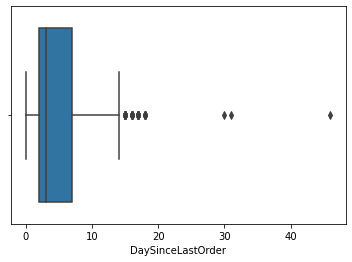

In [68]:
for col in column_names_num:
    sns.boxplot(x=data[col])
    plt.show()

As we can see, there are outliers in every numerical variable.

#### For 'WarehouseToHome' 

-15.0 33.0


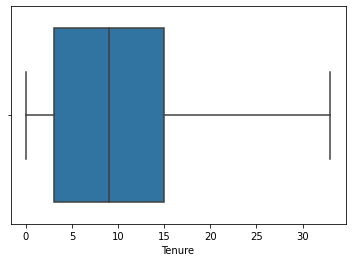

-7.5 36.5


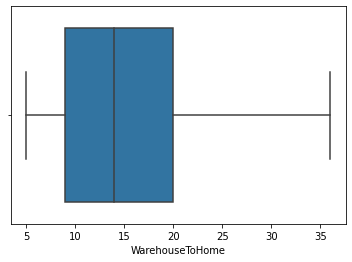

0.5 4.5


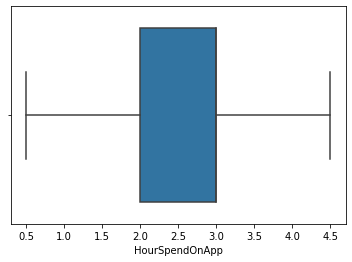

5.5 25.5


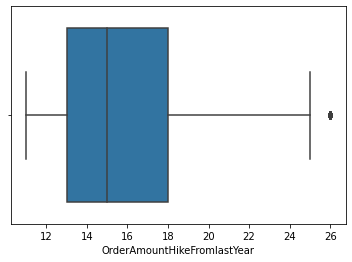

-0.5 3.5


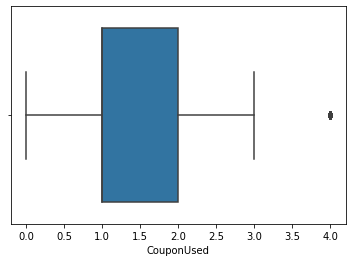

-2.0 6.0


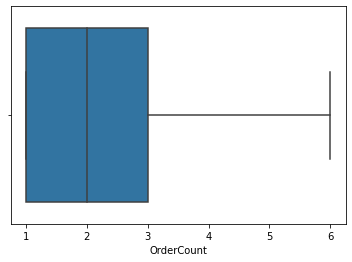

-5.5 14.5


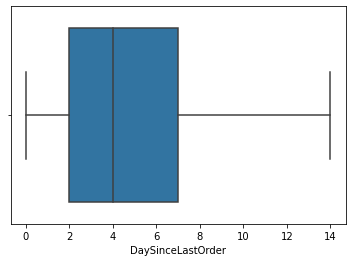

In [113]:
for col in column_names_num:
    IQR=data[col].quantile(0.75)-data[col].quantile(0.25)
    lower_limit=data[col].quantile(0.25)-(IQR*1.5)
    upper_limit=data[col].quantile(0.75)+(IQR*1.5)
    print(lower_limit, upper_limit)
    data[col] = np.where(data[col] <lower_limit, lower_limit.round(),data[col])
    data[col] = np.where(data[col] >upper_limit, upper_limit.round(),data[col])
    sns.boxplot(x=data[col])
    plt.show()

Here the interquartile range approach is used to detect and deal with the outliers. The upper limit and lower limit are found using the Interquartile range and whenever there is a value above or below it, those values are replaced by the upper limit value or the lower limit value.

In [114]:
data['CouponUsed'].dtype

dtype('float64')

In [115]:
data.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

If we notice the null value columns carefully, we can see that the data is missing from numerical columns. 

Check how many rows in total contains missing values.

In [116]:
len(data.loc[(data['Tenure'] == 0) | (data['WarehouseToHome'] == 0) | (data['HourSpendOnApp'] == 0) | (data['OrderAmountHikeFromlastYear'] == 0) | (data['CouponUsed'] == 0) | (data['OrderCount'] == 0) | (data['DaySinceLastOrder'] == 0)])


1546

As we can see, 1547 rows out of 5630 rows have missing values in them. Deleting rows with missing values will lead to loss of information. So we need to find a way to impute the values.

In order to make choices on what values to impute, we look at the distribution of the columns with missing data.

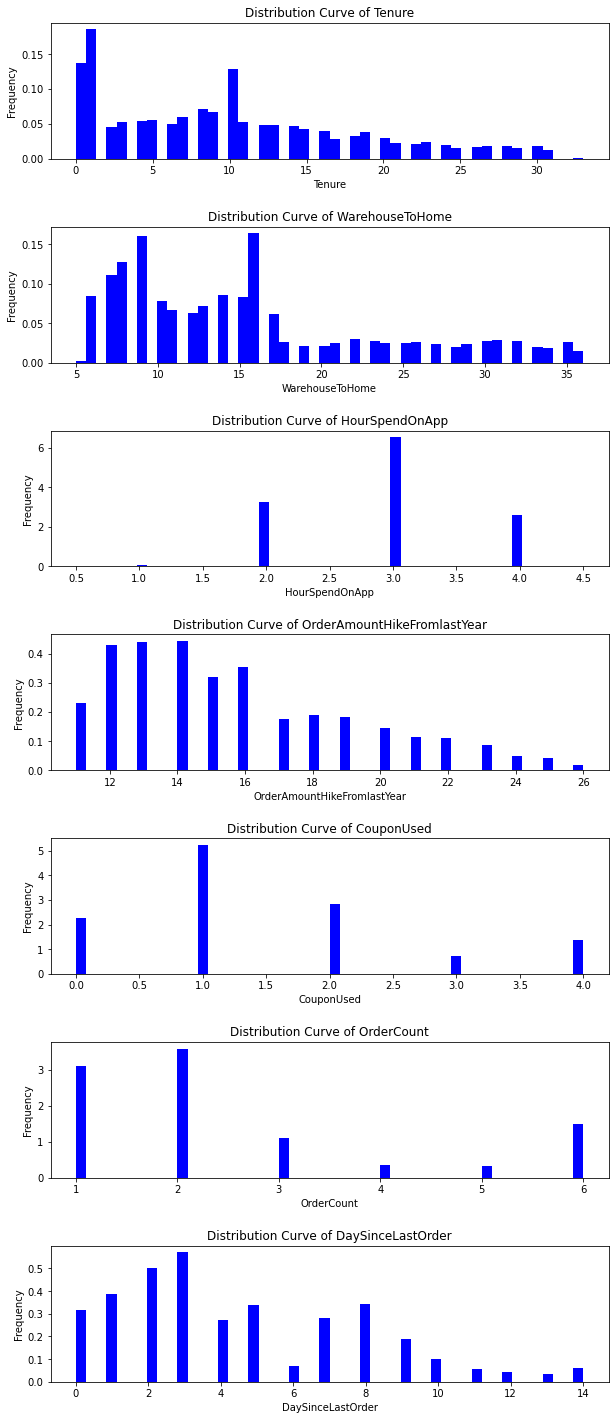

In [117]:


fig, axs = plt.subplots(nrows=len(column_names), figsize=(10, 25), gridspec_kw={'hspace': 0.5})
for i, col in enumerate(column_names):
    axs[i].hist(data[col], bins=50, color='blue', density='True')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Distribution Curve of ' + col)
plt.show()

In [118]:
for col in column_names:
    skewness = data[col].skew()
    print(f"Skewness of column {col}: {skewness}")




Skewness of column Tenure: 0.6760832112212937
Skewness of column WarehouseToHome: 0.9137633250206849
Skewness of column HourSpendOnApp: -0.032308104124598884
Skewness of column OrderAmountHikeFromlastYear: 0.7982361224155717
Skewness of column CouponUsed: 0.7926334958232194
Skewness of column OrderCount: 1.072243517094965
Skewness of column DaySinceLastOrder: 0.7140152780515369


If the skewness is between -0.5 and 0.5, the data are approximately symmetric.<br>
If the skewness is between -1 and -0.5 (negative skew), or between 0.5 and 1 (positive skew), the data are moderately skewed.<br>
If the skewness is less than -1 (highly negative skew), or greater than 1 (highly positive skew), the data are highly skewed.

HourSpendOnApp has very less skewness. So we can normally use mean to impute the values. But here, the numerical variable behaves like a categorical variable and using mean to impute missing values will create decimal values which are not very meaningful in the context. So we use mode imputation.

In [119]:
mode = data['HourSpendOnApp'].mode()[0]
data['HourSpendOnApp'].fillna(mode, inplace=True)

In [120]:
data['HourSpendOnApp'].isnull().sum()

0

We try to use the KNNImputer to impute the missing values from the other columns.

In [121]:
column_num = [col for col in column_names_num if col != 'HourSpendOnApp']
column_num

['Tenure',
 'WarehouseToHome',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [122]:
imputer = KNNImputer(n_neighbors=5)
for col in column_num:
    data[[col]] = imputer.fit_transform(data[[col]]).round()

In [123]:
data.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

All the missing values have been dealt with using the appropriate imputation methods.

### Bivariate Analysis 

C:\Users\Priya\AppData\Local\Temp/ipykernel_63960/2506531315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


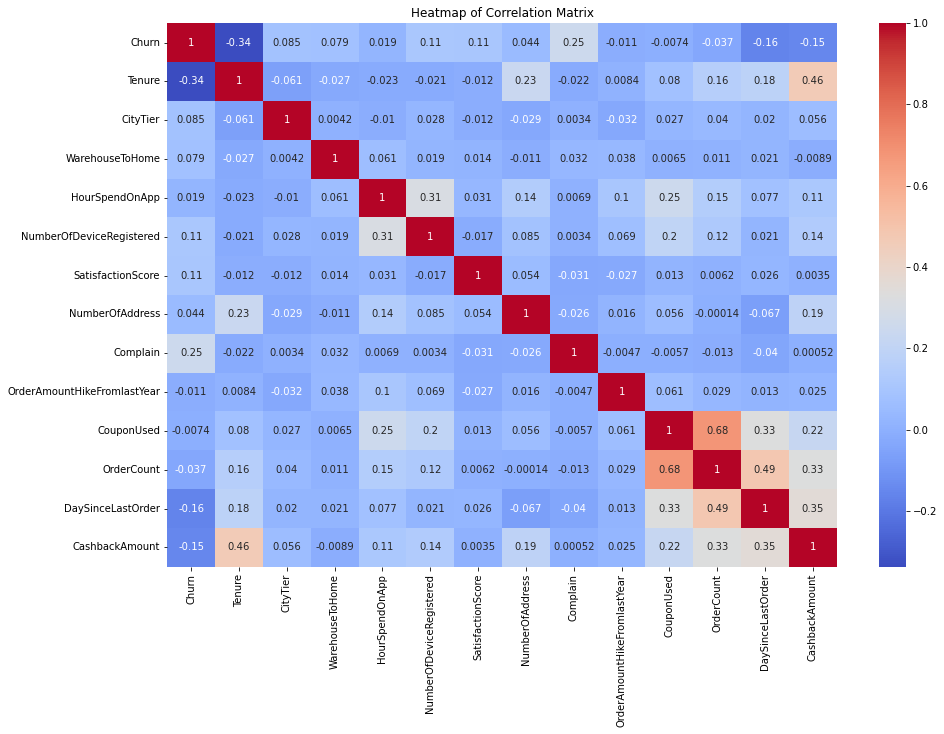

In [124]:
fig, ax = plt.subplots(figsize=(15, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [125]:
data_nochurn=data[data['Churn']==0]
len(data_nochurn)

4682

In [126]:
data_churn=data[data['Churn']==1]
len(data_churn)

948

We can see that the dataset is highly imbalanced. In the context of Support Vector Machines (SVM), downsampling is often used when the dataset has a significant class imbalance, meaning that one class has significantly fewer examples than the other.<br>

In SVM, the algorithm works by finding the hyperplane that best separates the two classes in the feature space. When the dataset is imbalanced, the SVM model will tend to favor the majority class since it has more examples, resulting in poor classification performance on the minority class.<br>

Downsampling involves randomly removing examples from the majority class until the dataset is balanced. This can improve the classification performance on the minority class by preventing the model from being biased towards the majority class.

In [127]:
data_nochurn_ds=resample(data_nochurn,replace=False, n_samples=900, random_state=42)
len(data_nochurn_ds)

900

In [128]:
data_churn_ds=resample(data_churn,replace=False, n_samples=900, random_state=42)
len(data_churn_ds)

900

In [129]:
data_ds=pd.concat([data_nochurn_ds, data_churn_ds])
len(data_ds)

1800

### Split the data into independent and dependent variables.

In [130]:
X=data_ds.drop('Churn', axis=1).copy()
X.head(1)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
585,6.0,Computer,3,23.0,Debit Card,Male,2.0,3,Grocery,3,Single,2,0,11.0,1.0,6.0,0.0,274.44


In [131]:
y=data_ds['Churn'].copy()
y.head(1)

585    0
Name: Churn, dtype: int64

Support Vector Machines (SVM) does not inherently support categorical variables. One way to handle categorical variables with SVM is to convert them into numerical features using techniques such as one-hot encoding or label encoding.<br>

In one-hot encoding, each categorical variable is converted into multiple binary features, where each feature represents a possible value of the original categorical variable.

In [132]:
X_en = pd.get_dummies(X, columns=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'SatisfactionScore', 'PreferedOrderCat', 'MaritalStatus']
)
X_en.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,SatisfactionScore_5,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
585,6.0,23.0,2.0,3,2,0,11.0,1.0,6.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3658,10.0,14.0,3.0,2,4,0,17.0,4.0,6.0,14.0,...,1,0,0,1,0,0,0,1,0,0
2630,19.0,32.0,3.0,4,9,0,15.0,1.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,1
3338,11.0,28.0,3.0,4,7,0,16.0,2.0,2.0,1.0,...,0,0,0,0,0,1,0,1,0,0
4953,2.0,22.0,3.0,4,3,0,17.0,1.0,3.0,3.0,...,0,0,0,0,0,1,0,0,1,0


In [133]:
X_en.dtypes


Tenure                                   float64
WarehouseToHome                          float64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                           float64
PreferredLoginDevice_Computer              uint8
PreferredLoginDevice_Mobile Phone          uint8
PreferredLoginDevice_Phone                 uint8
CityTier_1                                 uint8
CityTier_2                                 uint8
CityTier_3                                 uint8
PreferredPaymentMode_CC                    uint8
PreferredPaymentMode_COD                   uint8
PreferredPaymentMode_Cash on Delivery      uint8
PreferredPaymentMode

In [134]:
X_train, X_test, y_train, y_test =train_test_split(X_en,y, random_state=42)

In SVM, scaling the data can be important for two reasons:<br>

Optimization convergence: SVM tries to find the maximum margin separating hyperplane between two classes. This hyperplane is optimized by minimizing a loss function that penalizes misclassifications. If the features have different scales, then the optimization process may take longer to converge or may not converge at all. Scaling the features to a similar range can help to improve the convergence and stability of the optimization process.<br>

Impact of outliers: SVM is sensitive to outliers because it tries to maximize the margin between two classes. If the data contains outliers, then they can have a significant impact on the location of the decision boundary. Scaling the features can help to reduce the impact of outliers by making them less influential on the optimization process.

In [135]:
X_train_sc=scale(X_train)
X_test_sc=scale(X_test)

In [138]:
X_train_sc

array([[ 0.14923401, -0.02833018,  0.07009214, ..., -0.4022313 ,
         1.0899571 , -0.82281142],
       [ 0.63971705,  0.70248015, -1.36361065, ..., -0.4022313 ,
        -0.9174673 ,  1.21534531],
       [ 0.63971705, -1.12454568,  1.50379492, ..., -0.4022313 ,
         1.0899571 , -0.82281142],
       ...,
       [ 2.84689073,  2.40770426,  0.07009214, ..., -0.4022313 ,
         1.0899571 , -0.82281142],
       [-0.95435283, -1.00274395,  0.07009214, ...,  2.48613175,
        -0.9174673 , -0.82281142],
       [-0.83173207, -0.02833018,  1.50379492, ..., -0.4022313 ,
        -0.9174673 ,  1.21534531]])

In [139]:
X_test_sc

array([[ 0.30016377, -0.19638117, -1.23663576, ..., -0.43643578,
        -0.91473203,  1.26536796],
       [-0.94360877, -0.07776167, -1.23663576, ..., -0.43643578,
         1.09321633, -0.79028396],
       [ 0.17578652,  2.17600882,  0.1511101 , ..., -0.43643578,
         1.09321633, -0.79028396],
       ...,
       [-0.94360877, -1.02671767, -1.23663576, ..., -0.43643578,
         1.09321633, -0.79028396],
       [-0.94360877,  1.82015032,  0.1511101 , ..., -0.43643578,
         1.09321633, -0.79028396],
       [-0.94360877, -0.90809817,  0.1511101 , ...,  2.29128785,
        -0.91473203, -0.79028396]])

In [140]:
svm_model=SVC(random_state=42)

In [141]:
svm_model.fit(X_train_sc, y_train)

SVC(random_state=42)

To see how this model performed, we plot the confusion matrix and find out the 

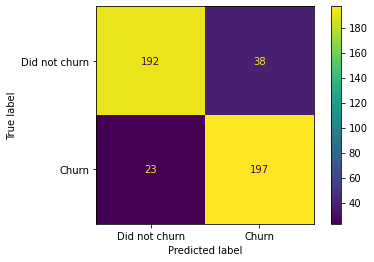

In [144]:
plot_confusion_matrix(svm_model, X_test_sc, y_test, values_format='d', display_labels=["Did not churn","Churn"])

Of the 230 people that did not churn, 192 were rightly classified by the model. This is 83.48%. Of the 220 people who churned, 197 were rightly classified. It is 89.55%.

We'll see if we can improve this classifier by optimizing the parameters.

In [145]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100],
              'kernel': ['rbf'],
              'gamma': ['scale', 0.001, 0.01, 0.1, 1, 10]}


In [146]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train_sc, y_train)
print(grid_search.best_params_)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Using the parameters given above, we'll optimize the svm model

In [147]:
svm_model=SVC(random_state=42, C=10, gamma=0.1)
svm_model.fit(X_train_sc, y_train)

SVC(C=10, gamma=0.1, random_state=42)

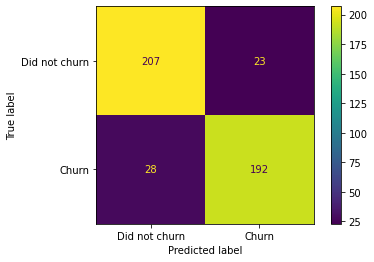

In [148]:
plot_confusion_matrix(svm_model, X_test_sc, y_test, values_format='d', display_labels=["Did not churn","Churn"])

In this optimized model, out of the 230 people who did not churn, 207 were correctly predicted by the model. This is 90%. Out of the 220 people who churned, 192 were correctly predicted. This is 87.3%. So this optimized model gives a better prediction than the original model.